# 机器学习入门——简单线性回归

用conda install scikit-learn安装sklearn学习包

In [20]:
from collections import OrderedDict
import pandas as pd

In [21]:
exDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,
            2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '分数':    [10,  22,  13,  43,  20,  22,  33,  50,  62,  
              48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]
}
exOrderDict=OrderedDict(exDict)
exDf=pd.DataFrame(exOrderDict)
exDf.head()

,学习时间,分数
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [22]:
#学习时间为特征，分数为标签
#提取特征和标签
ex_X=exDf.loc[:,'学习时间']
ex_y=exDf.loc[:,'分数']

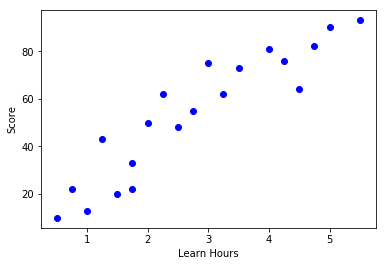

In [23]:
#制作散点图，引入绘图包
import matplotlib.pyplot as plt
#散点图
plt.scatter(ex_X, ex_y, color="b", label="ex data")
#添加图标标签
plt.xlabel("Learn Hours")
plt.ylabel("Score")
plt.show()

**train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取训练数据（train）和测试数据（test）**
第一个参数：所要划分的样本特征
第2个参数：所要划分的样本标签
train_size：训练数据占比，如果是整数的话就是样本的数量

In [24]:
from sklearn.cross_validation import train_test_split
X_train , X_test , y_train , y_test = train_test_split(ex_X ,
                                                       ex_y ,
                                                       train_size = 0.8)
print('原始数据特征：',ex_X.shape ,
      '，训练数据特征：', X_train.shape , 
      '，测试数据特征：',X_test.shape )

print('原始数据标签：',ex_y.shape ,
      '训练数据标签：', y_train.shape ,
      '测试数据标签：' ,y_test.shape)

原始数据特征： (20,) ，训练数据特征： (16,) ，测试数据特征： (4,)
原始数据标签： (20,) 训练数据标签： (16,) 测试数据标签： (4,)


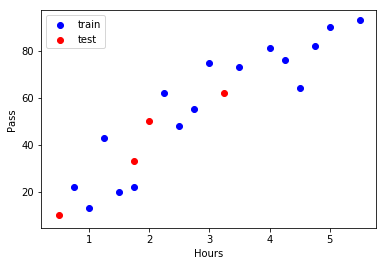

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="red", label="test")
plt.xlabel("Hours")
plt.ylabel("Pass")
plt.legend(loc=2)#图例显示的位置“upper left”
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression#第1步：导入线性回归
model = LinearRegression()# 第2步：创建模型：线性回归
model.fit(X_train , y_train)#第3步：训练模型

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.25  4.5   2.75  0.75  5.    3.    4.75  1.    2.5   4.    1.75  2.25
  5.5   4.25  1.5   3.5 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

sklearn要求输入的特征必须是二维数组的类型，但是因为我们目前只有1个特征，所以需要用安装错误提示用reshape转行成二维数组的类型。
错误提示信息：Reshape your data either using array.reshape(-1, 1) if your data has a single feature
'''

In [27]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)#将训练和测试数据特征转换成二维数组XX行*1列
from sklearn.linear_model import LinearRegression
# 第2步：创建模型：线性回归
model = LinearRegression()
#第3步：训练模型
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

最佳拟合线：z=𝑎+𝑏x
截距intercept：a
回归系数：b

In [28]:
a=model.intercept_#截距intercept_
b=model.coef_#回归系数coef_

In [29]:
print('最佳拟合线：截距a=',a,'，回归系数b=',b)

最佳拟合线：截距a= 9.64150105474 ，回归系数b= [ 15.84945043]


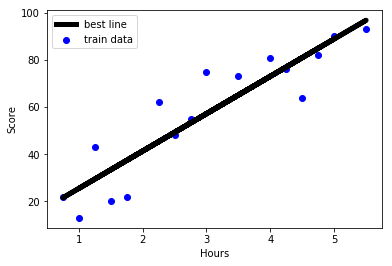

In [30]:
#绘图
import matplotlib.pyplot as plt
#训练数据散点图
plt.scatter(X_train, y_train, color='blue', label="train data")

#训练数据的预测值
y_train_pred = model.predict(X_train)
#绘制最佳拟合线
plt.plot(X_train, y_train_pred, color='black', linewidth=5, label="best line")

#添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Score")
#显示图像
plt.show()

## **相关系数：corr返回结果是一个数据框，存放的是相关系数矩阵**

In [32]:
rDf=exDf.corr()
print('相关系数矩阵：')
rDf

相关系数矩阵：


,学习时间,分数
学习时间,1.000000,0.923985
分数,0.923985,1.000000


## **线性回归的scroe方法得到的是决定系数R平方；评估模型:决定系数R平方**

In [33]:
model.score(X_test , y_test)

0.90036195403952468

## **得到训练数据的预测值**

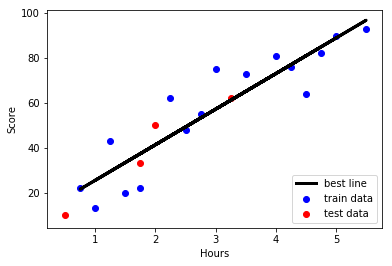

In [58]:
'''
绘图的代码不需要看懂，后面会有专门的课程讲如何将数据分析结果可视化
'''
#绘图
import matplotlib.pyplot as plt
#训练数据散点图
plt.scatter(X_train, y_train, color='blue', label="train data")

#训练数据的预测值
y_train_pred = model.predict(X_train)
#绘制最佳拟合线：标签用的是训练数据的预测值y_train_pred
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")

#测试数据散点图
plt.scatter(X_test, y_test, color='red', label="test data")

plt.legend(loc=4)
plt.xlabel("Hours")
plt.ylabel("Score")
#显示图像
plt.show()